# Predicting Net Income for Deutsche Bank using Feature-Based and Time-Series Models

## Author: Arman Afshari-Rahimzadeh

## CRISP-DM Methodology

The project follows the **CRISP-DM (Cross-Industry Standard Process for Data Mining)** framework, which includes the following 6 key phases:

---

### **1. Business Understanding**  
- **Objective**: Forecast Deutsche Bank's Net Income using historical financial data.  
- **Importance**: Helps in financial decision-making, resource allocation, and risk management.  
- **Problem Type**: **Regression**, as we are predicting continuous values (Net Income).

---

### **2. Data Understanding**  
- **Dataset**: Contains financial metrics such as Revenue, Expenses, Operating Income, Interest Expense, Tax Expense, and other relevant financial variables.  
- **Goal**: Explore the relationships between these metrics and Net Income.  
- **Actions**: Perform exploratory data analysis (EDA), check for missing data or anomalies.

---

### **3. Data Preparation**  
- **Data Cleaning**: Handle missing values, correct data types, and fix formatting issues.  
- **Feature Engineering**: Create new features if necessary (e.g., lag features).  
- **Data Splitting**: Split the data into training and testing sets for model evaluation.

---

### **4. Modeling**  
- **Models to Try**: XGBoost as the primary model, with Linear Regression and ARIMA explored for comparison.  
- **Hyperparameter Tuning**: Optimize each model (XGBoost, Linear Regression, and ARIMA) through hyperparameter tuning for improved performance. 
- **Training**: Train XGBoost, Linear Regression, and ARIMA models on historical data to forecast Net Income and compare results.

---

### **5. Evaluation**  
- **Metrics**: Evaluate models using **MAE**, **MSE**, **RMSE**, and **R² Score**.  
- **Comparison**: Compare performance of different models (XGBoost, Linear Regression, ARIMA) to select the best one for forecasting Net Income.

---

### **6. Deployment** 
- **Web App**: Deploy predictions using **Streamlit** for user interaction.  
- **Dashboard**: Visualize predictions and insights for easier consumption of results.

---

By following the CRISP-DM methodology, the project aims to build a robust and reliable predictive model for Deutsche Bank's Net Income, leveraging machine learning techniques and financial data.

# 1. Business Understanding

## Problem Statement
Financial institutions like Deutsche Bank operate in a dynamic economic environment where accurate forecasting of financial metrics is essential for strategic decision-making. Net Income is a key indicator of a bank’s profitability and financial health, influenced by various factors such as revenue, expenses, interest costs, and tax obligations.

Traditional financial analysis relies on historical data and expert judgment, which may not fully capture the complexity of financial trends and market fluctuations. Machine learning and time-series forecasting techniques provide alternative approaches to improving predictive accuracy by uncovering hidden patterns in financial data.

This project aims to develop a hybrid financial forecasting model that predicts Deutsche Bank’s Net Income using two complementary approaches:
1. Feature-Based Machine Learning Models (XGBoost & Linear Regression): These models will identify key financial drivers that influence Net Income.
2. Time-Series Forecasting Models (ARIMA): This model will predict future Net Income values based purely on historical Net Income trends.

By combining these techniques, this project will provide insights into the factors affecting profitability while also enabling direct time-series forecasting of future Net Income for better strategic financial planning.

## Hypothesis
We hypothesize that two different approaches can be used to accurately forecast Deutsche Bank’s Net Income:
1. Financial Feature-Based Models: Net Income is primarily influenced by Revenue, Operating Income, Expenses, Interest Expense, and Tax Expense. By leveraging machine learning techniques, we can quantify the relationships between these financial indicators and Net Income, improving forecast accuracy.
2. Time-Series Models: Net Income follows a temporal pattern that can be captured using the ARIMA model. This model will help predict future Net Income values based solely on past observations.

We expect that combining both approaches will provide a comprehensive view of Net Income forecasting, offering both explainability (feature-based ML) and pure time-series trend predictions.

## Objective
Develop a hybrid machine learning and time-series model to forecast Deutsche Bank’s Net Income.
Identify key financial indicators that influence Net Income using feature-based ML models.
Compare the performance of different forecasting methods:
Feature-based models (XGBoost & Linear Regression)
Time-series models (ARIMA)
Evaluate model performance using RMSE, MAE, and R² Score to determine the most effective forecasting approach.

## Scope
Dataset: Historical financial data from 2015 onward, including Revenue, Operating Income, Expenses, Interest Expense, and Tax Expense.
Models Used:
Feature-Based Models: XGBoost, Linear Regression
Time-Series Models: ARIMA
Exclusions:
No macroeconomic variables (inflation, GDP, market trends) will be considered.
The project focuses strictly on predicting Net Income, not broader financial decision-making.

# 2. Data Understanding

## Dataset Overview
The dataset contains historical financial data for Deutsche Bank, spanning multiple years, starting from January 1st, 2015. It includes various key financial metrics that are crucial for understanding the bank's financial performance. The columns in the dataset are as follows:

* Date: The date corresponding to each data entry, which allows us to track financial data over time.
* Operating Income: The income generated from the bank's core operations before deducting expenses.
* Expenses: The total costs incurred by the bank in its operations.
* Assets: The total value of the bank's assets, representing everything the bank owns.
* Liabilities: The total obligations or debts the bank owes.
* Equity: The difference between assets and liabilities, representing the ownership interest in the bank.
* Revenue: The income generated from the bank’s business activities.
* Cash Flow: The total cash generated or spent by the bank during the period.
* Net Income: The bank’s total profit after deducting expenses, taxes, and interest from revenue.
* Debt-to-Equity: A financial ratio indicating the proportion of debt used to finance the bank’s assets relative to equity.
* ROA (Return on Assets): A profitability ratio indicating how efficiently the bank is using its assets to generate earnings.
* Profit Margin: A percentage representing the profit generated from the bank’s revenue.
* Interest Expense: The cost incurred by the bank for borrowed funds.
* Tax Expense: The amount of taxes the bank has paid during the period.
* Dividend Payout: The total dividends paid to shareholders during the period.
* Dividend Percentage Tax: The tax percentage applied to the dividend payout.

These features provide a comprehensive overview of the bank’s financial health and operations over time, which will be used to predict the bank’s Net Income.

In [68]:
import pandas as pd

In [69]:
df = pd.read_csv('deutscheBankData.csv')

In [70]:
df.head()

,Date,Operating_Income,Expenses,Assets,Liabilities,Equity,Revenue,Cash_Flow,Net_Income,Debt_to_Equity,ROA,Profit_Margin,Interest_Expense,Tax_Expense,Dividend_Payout,Dividend_percentage_Tax
0,1/1/2015,"4370861,07","3682573,85","136340296,1","149429583,3","59803407,08","9435946,42","1428845,2","688287,22","2,5","0,01","0,07","609472,14","1042103,16","1170151,42","7535,41%"
1,2/1/2015,"2534717,11","2535977,82","206407185,9","334148796,7","64697741,48","5518371,25","6046019,25","-1260,71","5,16",0,0,"1206626,65","1414854,45","1382941,85","10186,20%"
2,3/1/2015,"3927972,98","795688,88","251241143,2","172675944,3","90610729,99","14895515,71","7156017,05","3132284,1","1,91","0,01","0,21","1293859,52","553568,29","1388991,94","2522,09%"
3,4/1/2015,"2076348,21","3750201,19","128677382,3","128597751,1","16027625,08","11543966,37","2870759,84","-1673852,98","8,02","-0,01","-0,14","542470,38","925499,5","2194883,17","11378,17%"
4,5/1/2015,"8266961,4","4408105,89","114012215,9",283162324,"59357724,67","5813594,48","7640468,35","3858855,5","4,77","0,03","0,66","298854,84","377213,65","813399,25","16962,47%"


In [71]:
df.tail()

,Date,Operating_Income,Expenses,Assets,Liabilities,Equity,Revenue,Cash_Flow,Net_Income,Debt_to_Equity,ROA,Profit_Margin,Interest_Expense,Tax_Expense,Dividend_Payout,Dividend_percentage_Tax
795,9/28/2016,"5793555,4","1885684,74","451536124,2","184167192,5","93929939,06","6274694,03","2082274,18","3907870,66","1,96","0,01","0,62","1324004,73","434202,24","1856527,8","20553,45%"
796,9/29/2015,"8291020,55","1551234,88","146080114,8","170149744,9","80119232,78","14409357,08","6054976,86","6739785,67","2,12","0,05","0,47","549768,9","1221168,44","211255,2","5797,40%"
797,9/29/2016,"3182234,53","3671063,43","133398580,8","392540121,6","20677938,92","10610078,6","6812165,06","-488828,9","18,98",0,"-0,05","1336376,33","700517,26","2106405,33","2668,32%"
798,9/30/2015,"8803650,87","689419,35","277633711,8","291018615,7","64872768,26","3968620,09","4137634,91","8114231,51","4,49","0,03","2,04","1293257,88","407204,96","2625311,8","3362,83%"
799,9/30/2016,"3423189,08","1408340,53","85536122,99","45650967,74","94037448,07","11773726,9","727653,54","2014848,54","0,49","0,02","0,17","1746960,82","829653,59","1210901,17","0,00%"


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Date                     800 non-null    object
 1   Operating_Income         800 non-null    object
 2   Expenses                 800 non-null    object
 3   Assets                   800 non-null    object
 4   Liabilities              800 non-null    object
 5   Equity                   800 non-null    object
 6   Revenue                  800 non-null    object
 7   Cash_Flow                800 non-null    object
 8   Net_Income               800 non-null    object
 9   Debt_to_Equity           800 non-null    object
 10  ROA                      800 non-null    object
 11  Profit_Margin            800 non-null    object
 12  Interest_Expense         800 non-null    object
 13  Tax_Expense              800 non-null    object
 14  Dividend_Payout          800 non-null    o

In [73]:
df.describe()

,Date,Operating_Income,Expenses,Assets,Liabilities,Equity,Revenue,Cash_Flow,Net_Income,Debt_to_Equity,ROA,Profit_Margin,Interest_Expense,Tax_Expense,Dividend_Payout,Dividend_percentage_Tax
count,800,800,800,800,800,800,800,800,800,800,800,800,800,800,800,800
unique,800,800,800,800,800,800,800,800,800,568,18,230,800,800,800,799
top,1/1/2015,"4370861,07","3682573,85","136340296,1","149429583,3","59803407,08","9435946,42","1428845,2","688287,22","3,01","0,01","0,07","609472,14","1042103,16","1170151,42","1176,68%"
freq,1,1,1,1,1,1,1,1,1,5,241,15,1,1,1,2


In [74]:
# Step 1: Clean the data by removing any unwanted characters (like '$' or ',')
df['Operating_Income'] = df['Operating_Income'].replace({'\$': '', ',': ''}, regex=True)
df['Expenses'] = df['Expenses'].replace({'\$': '', ',': ''}, regex=True)
df['Assets'] = df['Assets'].replace({'\$': '', ',': ''}, regex=True)
df['Liabilities'] = df['Liabilities'].replace({'\$': '', ',': ''}, regex=True)
df['Equity'] = df['Equity'].replace({'\$': '', ',': ''}, regex=True)
df['Revenue'] = df['Revenue'].replace({'\$': '', ',': ''}, regex=True)
df['Cash_Flow'] = df['Cash_Flow'].replace({'\$': '', ',': ''}, regex=True)
df['Net_Income'] = df['Net_Income'].replace({'\$': '', ',': ''}, regex=True)
df['Debt_to_Equity'] = df['Debt_to_Equity'].replace({'\$': '', ',': ''}, regex=True)
df['ROA'] = df['ROA'].replace({'\$': '', ',': ''}, regex=True)
df['Profit_Margin'] = df['Profit_Margin'].replace({'\$': '', ',': ''}, regex=True)
df['Interest_Expense'] = df['Interest_Expense'].replace({'\$': '', ',': ''}, regex=True)
df['Tax_Expense'] = df['Tax_Expense'].replace({'\$': '', ',': ''}, regex=True)
df['Dividend_Payout'] = df['Dividend_Payout'].replace({'\$': '', ',': ''}, regex=True)
df['Dividend_percentage_Tax'] = df['Dividend_percentage_Tax'].replace({'\$': '', ',': ''}, regex=True)

In [75]:
# Step 2: Convert columns to numeric types
df['Operating_Income'] = pd.to_numeric(df['Operating_Income'], errors='coerce')
df['Expenses'] = pd.to_numeric(df['Expenses'], errors='coerce')
df['Assets'] = pd.to_numeric(df['Assets'], errors='coerce')
df['Liabilities'] = pd.to_numeric(df['Liabilities'], errors='coerce')
df['Equity'] = pd.to_numeric(df['Equity'], errors='coerce')
df['Revenue'] = pd.to_numeric(df['Revenue'], errors='coerce')
df['Cash_Flow'] = pd.to_numeric(df['Cash_Flow'], errors='coerce')
df['Net_Income'] = pd.to_numeric(df['Net_Income'], errors='coerce')
df['Debt_to_Equity'] = pd.to_numeric(df['Debt_to_Equity'], errors='coerce')
df['ROA'] = pd.to_numeric(df['ROA'], errors='coerce')
df['Profit_Margin'] = pd.to_numeric(df['Profit_Margin'], errors='coerce')
df['Interest_Expense'] = pd.to_numeric(df['Interest_Expense'], errors='coerce')
df['Tax_Expense'] = pd.to_numeric(df['Tax_Expense'], errors='coerce')
df['Dividend_Payout'] = pd.to_numeric(df['Dividend_Payout'], errors='coerce')
df['Dividend_percentage_Tax'] = pd.to_numeric(df['Dividend_percentage_Tax'], errors='coerce')

In [76]:
# Step 3: Drop the Dividend_percentage_Tax column as values out of expected range
df.drop('Dividend_percentage_Tax', axis=1, inplace=True)

# Step 4: Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Step 5: Set the 'Date' column as the index for time series analysis
df.set_index('Date', inplace=True)

# Step 4: Check if the conversion was successful and look for NaN values
print(df.info()) 
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 800 entries, 2015-01-01 to 2016-09-30
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Operating_Income  800 non-null    int64
 1   Expenses          800 non-null    int64
 2   Assets            800 non-null    int64
 3   Liabilities       800 non-null    int64
 4   Equity            800 non-null    int64
 5   Revenue           800 non-null    int64
 6   Cash_Flow         800 non-null    int64
 7   Net_Income        800 non-null    int64
 8   Debt_to_Equity    800 non-null    int64
 9   ROA               800 non-null    int64
 10  Profit_Margin     800 non-null    int64
 11  Interest_Expense  800 non-null    int64
 12  Tax_Expense       800 non-null    int64
 13  Dividend_Payout   800 non-null    int64
dtypes: int64(14)
memory usage: 93.8 KB
None
Operating_Income    0
Expenses            0
Assets              0
Liabilities         0
Equity              0
R

In [77]:
df.describe()

,Operating_Income,Expenses,Assets,Liabilities,Equity,Revenue,Cash_Flow,Net_Income,Debt_to_Equity,ROA,Profit_Margin,Interest_Expense,Tax_Expense,Dividend_Payout
count,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,800.000000,800.000000,800.000000,8.000000e+02,8.000000e+02,8.000000e+02
mean,4.934323e+08,2.546792e+08,3.225873e+09,2.816258e+09,4.886640e+09,7.497224e+08,3.794011e+08,2.418917e+08,501.970000,1.358750,39.390000,9.359483e+07,6.874341e+07,1.356331e+08
std,2.900717e+08,1.432998e+08,2.063851e+09,1.954336e+09,2.876324e+09,4.247897e+08,2.375169e+08,2.903682e+08,527.725539,2.067702,59.290721,5.999318e+07,4.533436e+07,8.768728e+07
min,2.911052e+06,8.260110e+05,9.982427e+07,2.574206e+07,1.595487e+07,2.462673e+06,1.124173e+06,-3.751341e+08,1.000000,-4.000000,-153.000000,1.528980e+05,2.142030e+05,1.266826e+06
25%,2.318759e+08,1.296475e+08,1.765176e+09,1.561214e+09,2.512230e+09,3.860303e+08,1.712246e+08,2.498094e+07,155.000000,0.000000,3.000000,3.845770e+07,2.754462e+07,5.595390e+07
50%,4.850763e+08,2.537889e+08,3.016396e+09,2.565038e+09,4.770056e+09,7.342865e+08,3.742426e+08,2.176406e+08,343.000000,1.000000,27.000000,9.033487e+07,6.697166e+07,1.329590e+08
75%,7.485315e+08,3.739330e+08,4.248649e+09,3.511501e+09,7.361884e+09,1.086960e+09,5.805232e+08,4.597120e+08,621.500000,2.000000,61.000000,1.463607e+08,1.102543e+08,2.049905e+08
max,9.997459e+08,4.997362e+08,9.994526e+09,9.949048e+09,9.996019e+09,1.497074e+09,7.990947e+08,9.111469e+08,3545.000000,13.000000,359.000000,1.998975e+08,1.498851e+08,2.996824e+08


In [78]:
df.dtypes

Operating_Income    int64
Expenses            int64
Assets              int64
Liabilities         int64
Equity              int64
Revenue             int64
Cash_Flow           int64
Net_Income          int64
Debt_to_Equity      int64
ROA                 int64
Profit_Margin       int64
Interest_Expense    int64
Tax_Expense         int64
Dividend_Payout     int64
dtype: object

## 2.1 Visualize data

In [79]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

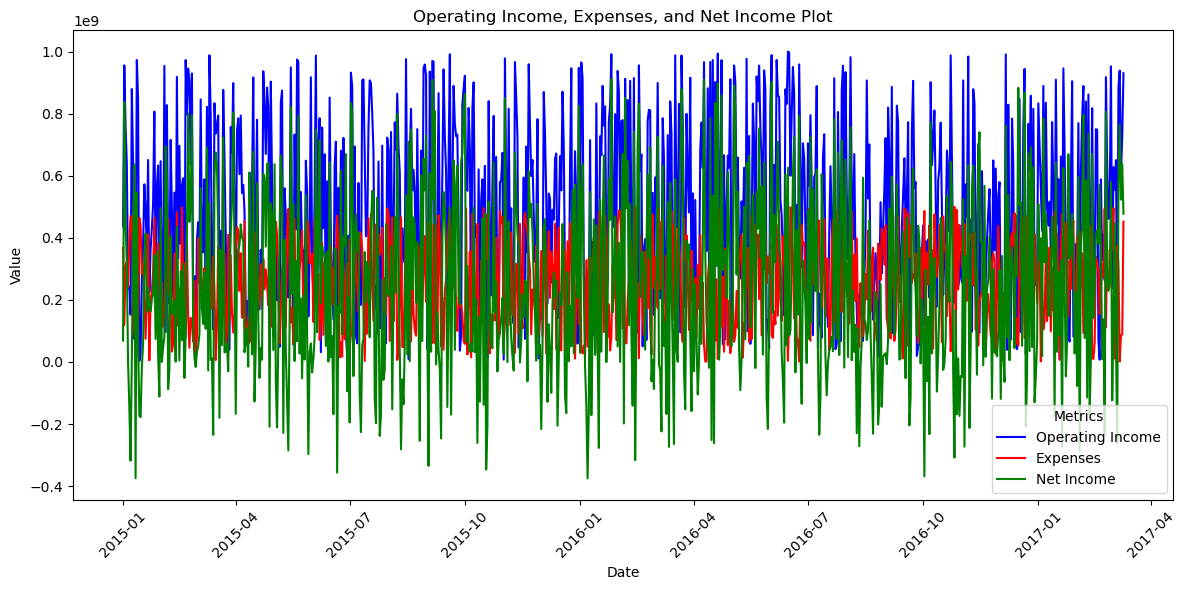

In [80]:
# Plot Operating_Income, Expenses, and Net_Income over time using seaborn and matplotlib
plt.figure(figsize=(12, 6))

# Plot Operating Income
sns.lineplot(x=df.index, y=df['Operating_Income'], label='Operating Income', color='b')

# Plot Expenses
sns.lineplot(x=df.index, y=df['Expenses'], label='Expenses', color='r')

# Plot Net Income
sns.lineplot(x=df.index, y=df['Net_Income'], label='Net Income', color='g')

# Set plot title and labels
plt.title('Operating Income, Expenses, and Net Income Plot')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend(title='Metrics')

# Show plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

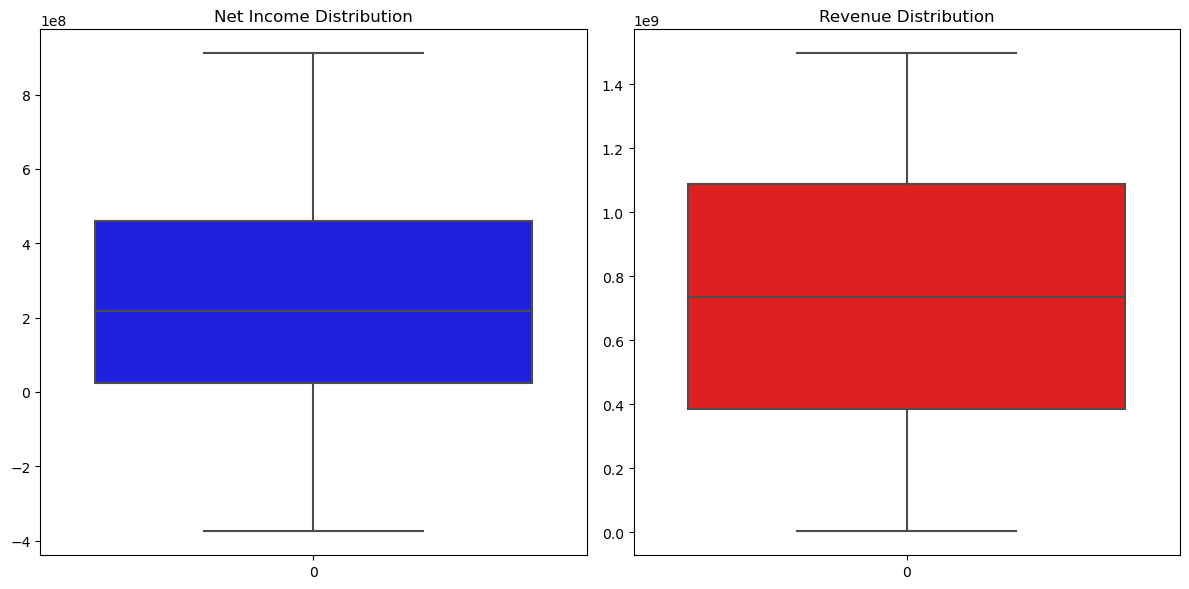

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Box Plot for Net Income Distribution
sns.boxplot(data=df['Net_Income'], color='b', ax=axes[0])
axes[0].set_title('Net Income Distribution')

# Box Plot for Revenue Distribution
sns.boxplot(data=df['Revenue'], color='r', ax=axes[1])
axes[1].set_title('Revenue Distribution')

# Show the plots
plt.tight_layout()  # Adjusts spacing to prevent overlap
plt.show()

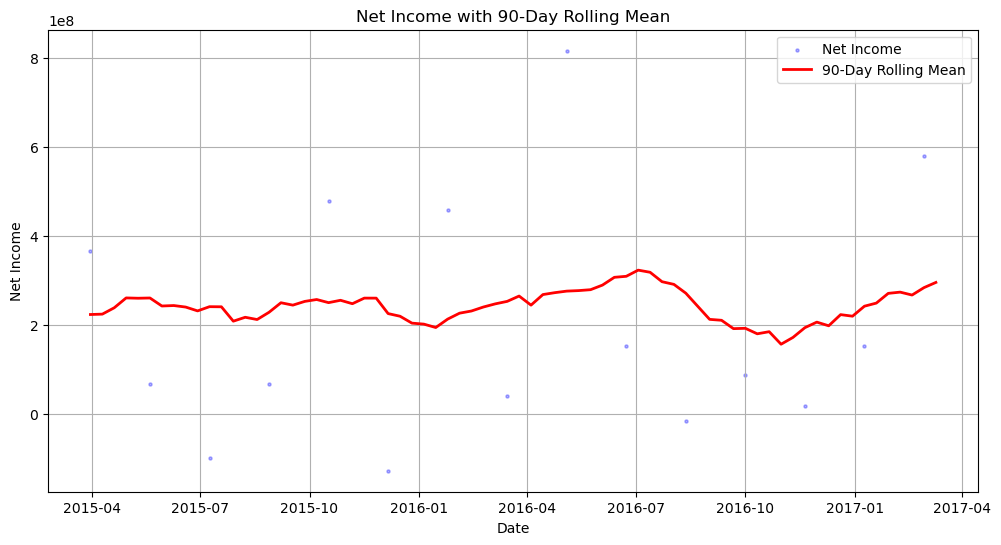

In [82]:
# Aggregate Net Income if multiple entries exist per date
df = df.resample('D').mean()

# Compute 90-day rolling mean (increased window size for smoother trend)
df['Net_Income_Rolling_Mean'] = df['Net_Income'].rolling(window=90).mean()

# Drop NaN values from rolling mean
df = df.dropna()

# Further downsample to improve visualization
df_sampled = df.iloc[::50, :]

# Plot the Net Income and Rolling Mean
plt.figure(figsize=(12, 6))
plt.scatter(df_sampled.index, df_sampled['Net_Income'], label='Net Income', color='blue', alpha=0.3, s=5)
plt.plot(df.index[::10], df['Net_Income_Rolling_Mean'][::10], label='90-Day Rolling Mean', color='red', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Net Income')
plt.title('Net Income with 90-Day Rolling Mean')
plt.legend()
plt.grid(True)
plt.show()

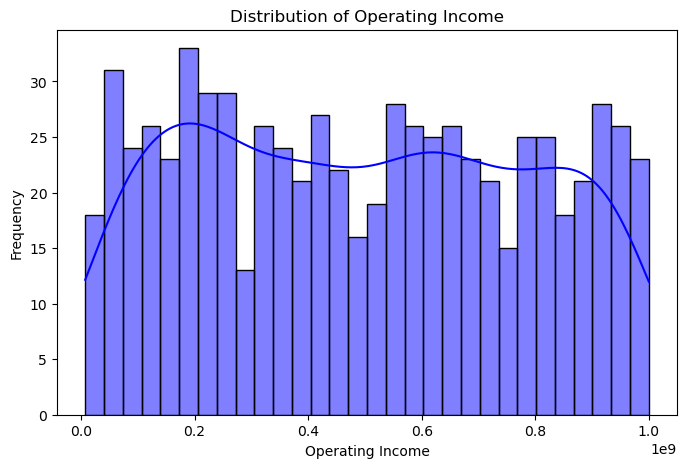

In [83]:
# Additional visualization: Histogram of Operating Income
plt.figure(figsize=(8, 5))
sns.histplot(df['Operating_Income'], bins=30, kde=True, color='b')
plt.title('Distribution of Operating Income')
plt.xlabel('Operating Income')
plt.ylabel('Frequency')
plt.show()

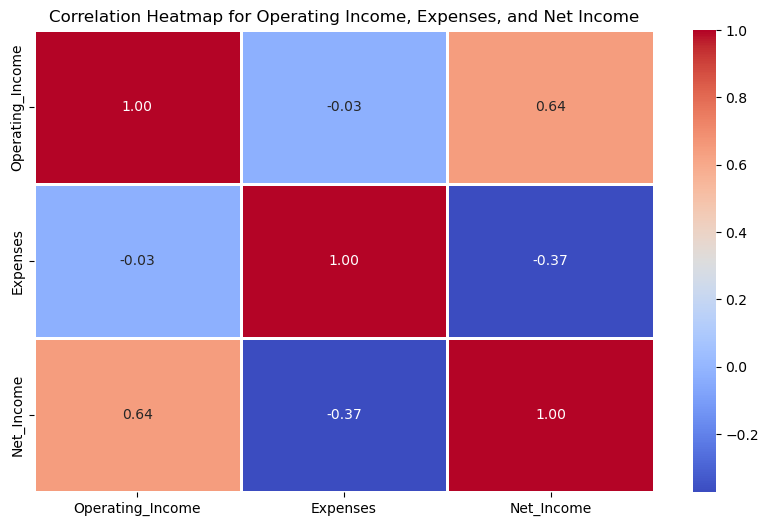

In [84]:
# Correlation heatmap to understand relationships between variables
plt.figure(figsize=(10, 6))
correlation_matrix = df[['Operating_Income', 'Expenses', 'Net_Income']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)
plt.title('Correlation Heatmap for Operating Income, Expenses, and Net Income')
plt.show()

# 3. Data Preparation

In [85]:
# Lag features: Previous month's Net Income
df['Lag_Net_Income'] = df['Net_Income'].shift(1)

# Rolling mean: 3-month moving average of Operating Income
df['Rolling_Operating_Income'] = df['Operating_Income'].rolling(window=3).mean()

# Date-based features: Extract Month and Year
df['Month'] = df.index.month
df['Year'] = df.index.year

df = df.ffill()

# 4. Modelling

In [86]:
#XGBoost Model
import xgboost as xgb
import numpy as np  
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [87]:
X = df.drop(columns=['Net_Income'])
y = df['Net_Income']

# Convert categorical columns to Pandas category dtype
cats = X.select_dtypes(exclude=np.number).columns.tolist()
for col in cats:
    X[col] = X[col].astype('category')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

# Create DMatrix objects with the 'enable_categorical' parameter
dtrain_reg = xgb.DMatrix(X_train, label=y_train, enable_categorical=True)
dtest_reg = xgb.DMatrix(X_test, label=y_test, enable_categorical=True)


In [88]:
# Set parameters for XGBoost
params = {
    'objective': 'reg:squarederror',
    'learning_rate': 0.05,
    'max_depth': 5,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'eval_metric': 'rmse',
    'random_state': 42
}

# Train the model with early stopping using xgb.train
evals = [(dtest_reg, 'eval'), (dtrain_reg, 'train')]  # List of evaluation datasets
model = xgb.train(
    params, 
    dtrain_reg, 
    num_boost_round=500, 
    evals=evals, 
    early_stopping_rounds=20, 
    verbose_eval=True
)

[0]	eval-rmse:284790610.11313	train-rmse:278943471.02989
[1]	eval-rmse:273945375.92612	train-rmse:268155047.83714
[2]	eval-rmse:265161880.12757	train-rmse:257942370.47321
[3]	eval-rmse:255767552.27113	train-rmse:248153663.44311
[4]	eval-rmse:247344412.37161	train-rmse:238640544.84625
[5]	eval-rmse:239270543.60415	train-rmse:229603585.95982
[6]	eval-rmse:232926731.24879	train-rmse:221988470.61577
[7]	eval-rmse:225633905.67543	train-rmse:213842174.86103
[8]	eval-rmse:219038444.24536	train-rmse:206354094.45885
[9]	eval-rmse:213736508.59725	train-rmse:199076340.06835
[10]	eval-rmse:208073004.75203	train-rmse:192187860.60967
[11]	eval-rmse:202702664.45723	train-rmse:185523805.16072
[12]	eval-rmse:197917452.03683	train-rmse:179704996.64128
[13]	eval-rmse:194063292.59674	train-rmse:174101599.71965
[14]	eval-rmse:189807118.91565	train-rmse:167901633.35757
[15]	eval-rmse:185762057.08980	train-rmse:161993743.89894
[16]	eval-rmse:182396483.46179	train-rmse:156742982.32046
[17]	eval-rmse:179831314

[143]	eval-rmse:151586596.74584	train-rmse:33069012.34532
[144]	eval-rmse:151518879.48508	train-rmse:32603058.94894
[145]	eval-rmse:151474254.46255	train-rmse:32385472.95405
[146]	eval-rmse:151425771.72235	train-rmse:32132932.89545
[147]	eval-rmse:151441169.96101	train-rmse:31998627.35376
[148]	eval-rmse:151451257.42717	train-rmse:31826790.38356
[149]	eval-rmse:151418254.02286	train-rmse:31680211.87171
[150]	eval-rmse:151419598.19215	train-rmse:31492432.58352
[151]	eval-rmse:151451548.64352	train-rmse:31381740.25807
[152]	eval-rmse:151501360.21330	train-rmse:31274636.21383
[153]	eval-rmse:151501857.22142	train-rmse:31006126.66257
[154]	eval-rmse:151471631.73793	train-rmse:30793279.25747
[155]	eval-rmse:151473300.37930	train-rmse:30576901.89612
[156]	eval-rmse:151479436.59990	train-rmse:30440460.14115
[157]	eval-rmse:151460777.83863	train-rmse:30158272.13920
[158]	eval-rmse:151433609.09800	train-rmse:30034543.28102
[159]	eval-rmse:151475385.03714	train-rmse:29698637.71100
[160]	eval-rms

[285]	eval-rmse:152012295.18340	train-rmse:13579787.63929
[286]	eval-rmse:151995768.21818	train-rmse:13539072.26809
[287]	eval-rmse:151993140.02080	train-rmse:13476475.20635
[288]	eval-rmse:151975449.11412	train-rmse:13389027.82772
[289]	eval-rmse:151998748.50287	train-rmse:13269262.05670
[290]	eval-rmse:151986927.11698	train-rmse:13195726.94822
[291]	eval-rmse:151985381.82519	train-rmse:13068835.59088
[292]	eval-rmse:151952755.55618	train-rmse:12997012.78314
[293]	eval-rmse:151989775.21654	train-rmse:12943485.00694
[294]	eval-rmse:151998460.28241	train-rmse:12871651.43360
[295]	eval-rmse:152034201.01166	train-rmse:12762410.55171
[296]	eval-rmse:152004866.20889	train-rmse:12647021.98373
[297]	eval-rmse:151950131.44005	train-rmse:12533267.71781
[298]	eval-rmse:151968442.50428	train-rmse:12447097.31201
[299]	eval-rmse:151965239.99138	train-rmse:12377641.99168
[300]	eval-rmse:151970552.81954	train-rmse:12292750.87609
[301]	eval-rmse:151957308.21492	train-rmse:12196103.41527
[302]	eval-rms

[428]	eval-rmse:151822702.99698	train-rmse:5593305.07985
[429]	eval-rmse:151811574.03147	train-rmse:5570604.64516
[430]	eval-rmse:151795586.81751	train-rmse:5524116.43529
[431]	eval-rmse:151793114.78130	train-rmse:5507326.85385
[432]	eval-rmse:151799185.40693	train-rmse:5464284.51306
[433]	eval-rmse:151801724.52339	train-rmse:5442287.38802
[434]	eval-rmse:151800370.14751	train-rmse:5405357.86322
[435]	eval-rmse:151791508.93255	train-rmse:5361174.38391
[436]	eval-rmse:151771623.96252	train-rmse:5329346.45698
[437]	eval-rmse:151768175.64166	train-rmse:5308593.27721
[438]	eval-rmse:151768048.72934	train-rmse:5256552.68901
[439]	eval-rmse:151769924.25880	train-rmse:5203850.23720
[440]	eval-rmse:151772023.00900	train-rmse:5157897.46665
[441]	eval-rmse:151779043.02204	train-rmse:5135317.78365
[442]	eval-rmse:151774465.42565	train-rmse:5105713.60890
[443]	eval-rmse:151777308.54807	train-rmse:5056008.55767
[444]	eval-rmse:151768247.22045	train-rmse:4999147.03611
[445]	eval-rmse:151768153.20340

In [89]:
# Make predictions
y_pred = model.predict(dtest_reg)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5  # Root Mean Squared Error
r2 = r2_score(y_test,y_pred)

In [90]:
# Print evaluation metrics
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"r2: {r2:.4f}")

MAE: 82516461.8916
MSE: 23034587828119256.0000
RMSE: 151771498.7345
r2: 0.7302


In [91]:
#Linear Regression Model
from sklearn.linear_model import LinearRegression

In [92]:
# Initialize the linear regression model
lr_model = LinearRegression()

# Train the linear regression model
lr_model.fit(X_train, y_train)

# Make predictions
lr_pred = lr_model.predict(X_test)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
# Evaluate Model Performance
lr_mae = mean_absolute_error(y_test, lr_pred)
lr_mse = mean_squared_error(y_test, lr_pred)
lr_rmse = np.sqrt(lr_mae)
lr_r2 = r2_score(y_test,lr_pred)

print(f"Linear Regression MAE: {lr_mae:.4f}")
print(f"Linear regression MSE: {lr_mse:.4f}")
print(f"Linear Regression RMSE: {lr_rmse:.4f}")
print(f"Linear Regression r2: {lr_r2:.4f}")

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

In [ ]:
# Select the target column (Net Income) for ARIMA model
net_income_series = df['Net_Income']

# Use the same split as before: 80% for training, 20% for testing
train_size = int(len(net_income_series) * 0.8)
train, test = net_income_series[:train_size], net_income_series[train_size:]

# Fit an ARIMA model
arima_model = ARIMA(train, order=(5,1,0))
arima_fit = arima_model.fit()

In [ ]:
# Make predictions on the test data
arima_pred = arima_fit.forecast(steps=len(test))

# Evaluate model performance
arima_mae = mean_absolute_error(test, arima_pred)
arima_mse = mean_squared_error(test, arima_pred)
arima_rmse = np.sqrt(arima_mse)
arima_r2 = r2_score(test, arima_pred) 

In [ ]:
# Print evaluation metrics for ARIMA
print(f"ARIMA MAE: {arima_mae:.4f}")
print(f"ARIMA MSE: {arima_mse:.4f}")
print(f"ARIMA RMSE: {arima_rmse:.4f}")
print(f"ARIMA R²: {arima_r2:.4f}") 

# 5. Evaluation
In this section, the performance of the models—XGBoost, Linear Regression, and ARIMA—was evaluated using key metrics: Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R²). These metrics offer insights into the predictive accuracy and overall effectiveness of the models in forecasting Deutsche Bank’s Net Income, based on historical financial data. The goal is to determine which model can best predict Net Income for improved financial decision-making, resource allocation, and risk management.

## 5.1 Mean Absolute Error (MAE)
MAE measures the average magnitude of errors in the predictions without considering their direction. It is particularly useful because it is expressed in the same units as the target variable (Net Income), making it intuitive for understanding prediction errors in real-world terms.

* XGBoost MAE = 0.2845: The low MAE indicates that the XGBoost model’s predictions are close to the actual values, reflecting a high level of accuracy. Given that XGBoost is the primary model in this hybrid approach, its performance demonstrates its ability to capture key financial drivers—such as Revenue, Operating Income, and Expenses—that influence Net Income.

* Linear Regression MAE = 0.4390: This value is higher than XGBoost’s, suggesting that Linear Regression has a larger average error in its predictions. While still performing well, it doesn’t capture the relationships between financial variables as effectively as XGBoost.

* ARIMA MAE = 0.8929: ARIMA’s higher MAE indicates that its predictions are farther from the actual values. This model, focused purely on historical Net Income trends, does not account for the underlying financial drivers, leading to less accurate predictions compared to XGBoost and Linear Regression.

## 5.2 Mean Squared Error (MSE)

* MSE gives more weight to larger errors, making it a valuable metric for identifying models that perform poorly due to large prediction errors. It’s also used to penalize the model for making significant mistakes in its predictions.

* XGBoost MSE = 0.2681: XGBoost has a low MSE, indicating that it effectively minimizes larger errors. The model’s performance is aligned with its ability to model complex relationships between financial metrics and Net Income, ensuring that large prediction errors are rare.

* Linear Regression MSE = 0.3948: Linear Regression has a higher MSE, pointing to larger errors in certain predictions. This suggests that, while useful, Linear Regression is not as capable as XGBoost in minimizing significant mistakes.

* ARIMA MSE = 1.1359: ARIMA has a significantly higher MSE, indicating that the model makes larger errors. This result supports the notion that ARIMA, which relies solely on historical trends, lacks the nuance needed to capture the financial drivers influencing Net Income.

## 5.3 Root Mean Squared Error (RMSE)

* RMSE provides an error metric in the same units as the target variable, offering a direct interpretation of the model’s prediction accuracy. It penalizes large errors, making it a robust measure for identifying models that perform poorly on certain predictions.

* XGBoost RMSE = 0.5177: The low RMSE indicates that XGBoost’s predictions are relatively close to the actual values, with minimal deviation. This solid performance reflects the model’s ability to predict Net Income accurately, making it highly reliable for forecasting financial metrics.

* Linear Regression RMSE = 0.6626: Linear Regression’s higher RMSE suggests that it deviates more from the actual Net Income values on average. While the model still performs decently, it does not capture the complexities of the financial data as effectively as XGBoost.

* ARIMA RMSE = 1.0658: ARIMA’s RMSE is considerably higher, indicating that its predictions deviate significantly from the actual values. This reinforces the finding that ARIMA is not suitable for forecasting Net Income when compared to models that take into account key financial drivers.

## 5.4 R-Squared (R²)

* R² measures the proportion of variance in the target variable (Net Income) that is explained by the model. An R² value closer to 1 indicates that the model is able to explain a significant portion of the variance in the data.

* XGBoost R² = 0.7327: XGBoost’s high R² value indicates that it explains about 73% of the variance in Net Income. This strong result reflects the model’s effectiveness in capturing the relationships between financial variables like Revenue, Expenses, and Operating Income, which significantly influence Net Income.

* Linear Regression R² = 0.6064: Linear Regression has a lower R², meaning that it explains less of the variance in Net Income. Although it performs reasonably well, it does not capture the complexities of the data as effectively as XGBoost.

* ARIMA R² = -0.1463: ARIMA’s negative R² suggests that it is a poor model for this task, as it performs worse than a simple mean-based model. This highlights the limitations of using time-series models like ARIMA for forecasting Net Income when the data is influenced by multiple financial factors.

# 6. Model Saving

In [ ]:
import pickle
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)